In [360]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from utils.result_print import result_print


In [361]:
dataset=pd.read_csv('./input/creditcard.csv')

In [362]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


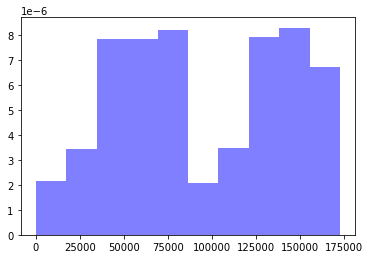

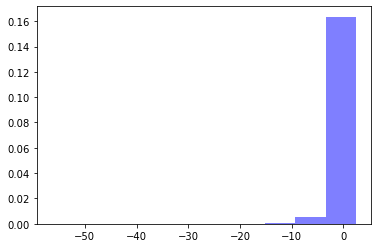

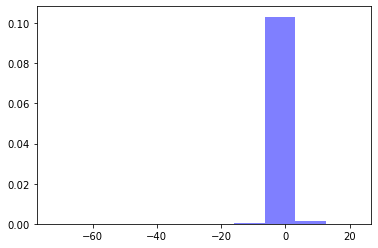

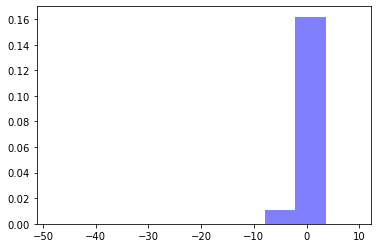

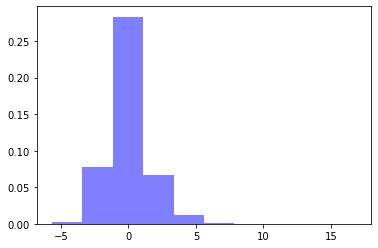

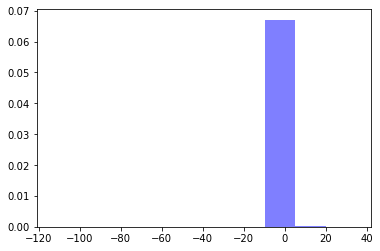

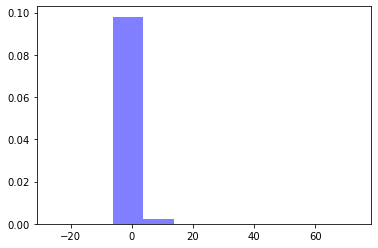

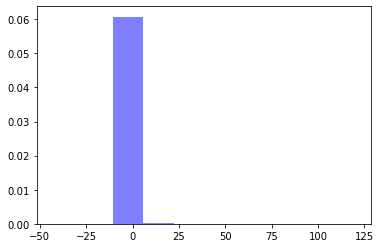

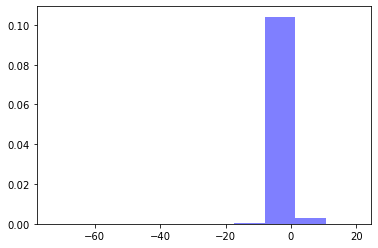

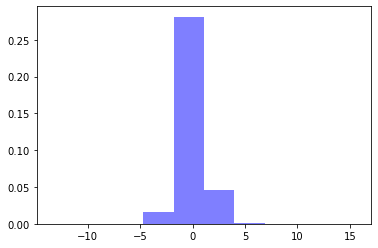

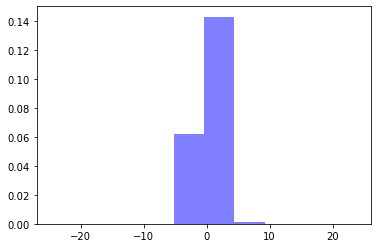

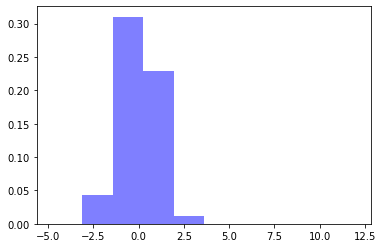

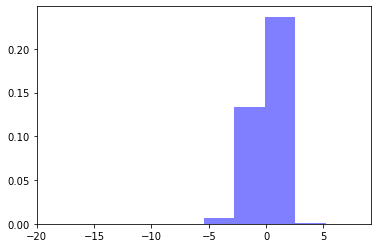

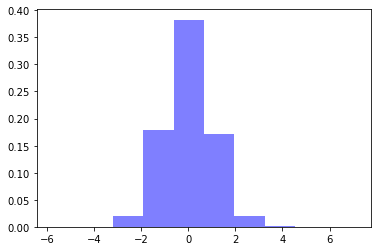

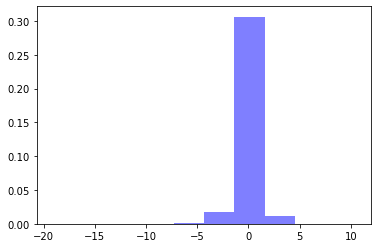

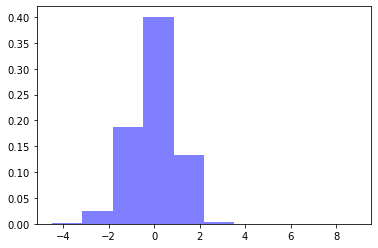

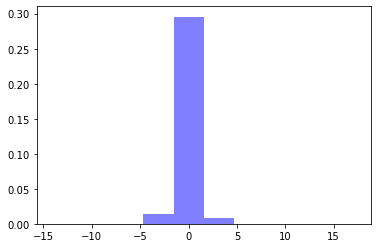

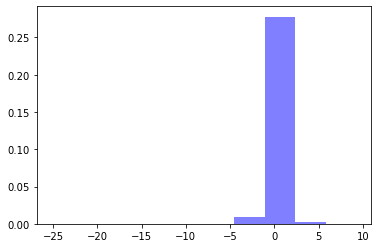

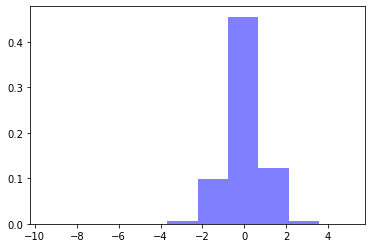

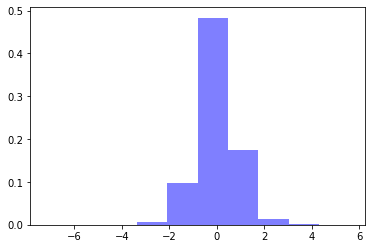

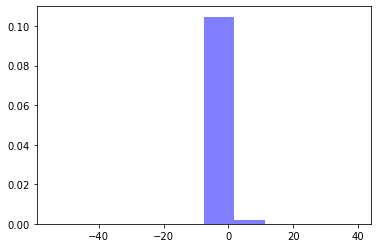

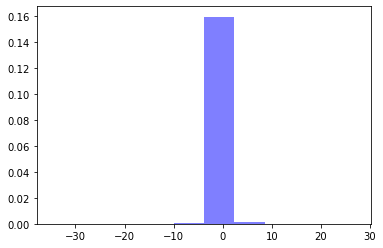

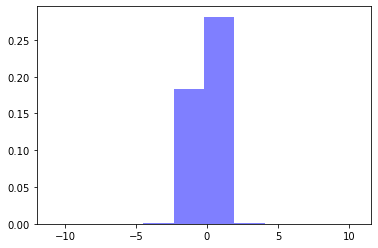

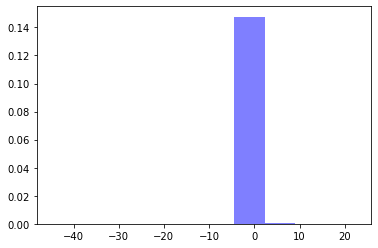

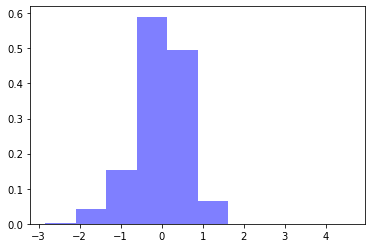

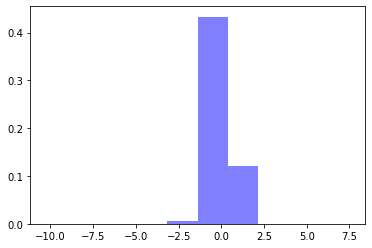

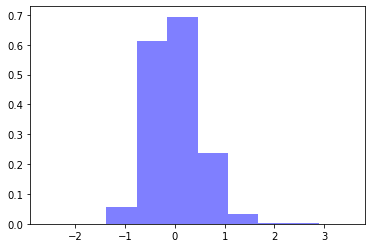

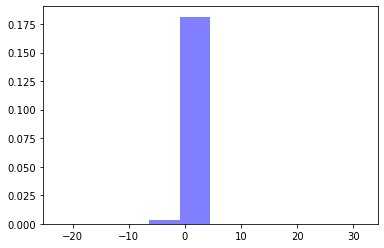

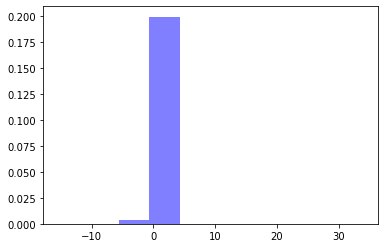

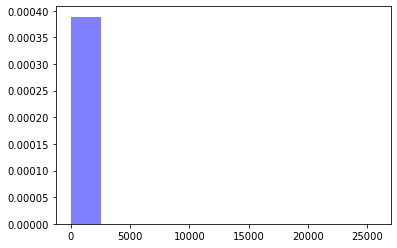

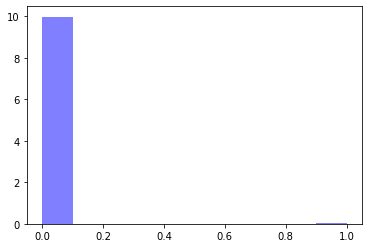

In [364]:
# Print all histograms for each dataset column
for column in dataset.columns:
    print(column)
    plt.hist(
        dataset[column].tolist(),
        density=True,
        histtype='stepfilled',
        facecolor='b',
        alpha=0.5
    )
    plt.show()

In [365]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [366]:
dataset['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

As you can see bellow, the data is heavily unbalanced, with 99.8 to 0.1 ratio

<AxesSubplot:xlabel='Class'>

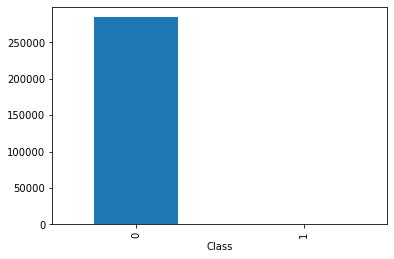

In [367]:
dataset.groupby('Class')["Class"].count().plot.bar()

In [368]:
# TODO: Wellington
# This could be oversampling, but we choose to mionimize the effort
# this implementation is based on https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

# undersampling
shuffled_df = dataset.sample(frac=1,random_state=4)

fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

normalized_df = pd.concat([fraud_df, non_fraud_df])

<AxesSubplot:xlabel='Class'>

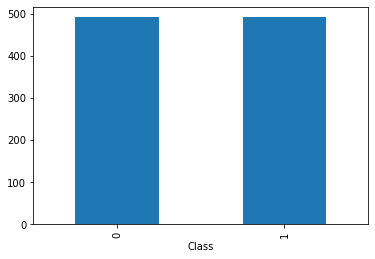

In [369]:
normalized_df.groupby('Class')["Class"].count().plot.bar()

In [370]:
dataset_unbalanced = dataset.copy()
dataset = normalized_df

In [371]:
scale=StandardScaler()

In [372]:
scale.fit(dataset.drop(['Class','Time','Amount'],axis=1))
scale.fit(dataset_unbalanced.drop(['Class','Time','Amount'],axis=1))


StandardScaler()

In [373]:
scaled_features=scale.transform(dataset.drop(['Class','Time','Amount'],axis=1))
scaled_unbalanced_features=scale.transform(dataset_unbalanced.drop(['Class','Time','Amount'],axis=1))

In [374]:
dataset_feat=pd.DataFrame(scaled_features,columns=dataset.columns[1:-2])
dataset_unbalanced_feat=pd.DataFrame(scaled_unbalanced_features,columns=dataset.columns[1:-2])

In [375]:
dataset_feat.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.470390,3.164431,-7.296497,4.724988,-4.173119,-1.684368,-9.053474,3.361426,-3.121436,-10.618517,...,3.841252,1.545476,2.726781,0.483811,1.273510,-1.285205,-3.159193,1.011017,3.537167,1.766747
1,-1.024450,2.226467,-3.603497,5.107869,-1.179400,-0.748163,-3.475760,1.899665,-3.323290,-4.041823,...,1.976923,0.615384,0.971933,-0.088008,0.268948,-0.742784,0.045469,1.113389,1.203731,-0.128433
2,-2.120300,4.968672,-9.913729,7.295958,-2.893999,-2.439458,-8.419505,3.868883,-5.198517,-10.834554,...,1.470773,1.832380,2.691528,0.353466,0.778126,-1.979409,-1.010149,1.316547,4.031420,2.191072
3,0.607438,0.570633,0.054301,2.135830,0.298792,-0.160939,0.043293,-0.092396,0.804454,-0.509000,...,-1.062731,-0.186056,-0.684302,-1.443292,-0.090882,-0.562521,1.038287,-0.203847,-0.007534,0.150929
4,-0.261577,2.923178,-5.258979,5.179910,0.266405,-1.542578,-2.373192,1.198147,-4.136717,-4.829046,...,1.022769,1.043036,0.729208,-0.633176,-0.014995,-1.883007,-0.012364,1.094860,1.384631,0.383288
5,-3.751459,1.451604,-4.994126,3.656998,-2.068357,-1.347505,-7.099908,0.366020,-3.404783,-7.652918,...,3.028350,0.094904,-0.238622,0.748691,-0.877487,-0.831710,-0.596483,-0.340060,2.967792,1.145733
6,-12.209217,8.336398,-16.971933,4.443159,-12.885272,-3.432114,-14.057784,13.224034,-3.476905,-7.753390,...,1.202198,2.127367,2.414356,-2.409294,-1.750482,0.244049,3.191762,-0.458342,3.612390,1.303658
7,-10.028046,8.905883,-15.037891,8.556368,-10.793823,0.631087,-22.642864,-9.980015,-8.156450,-17.369960,...,1.747621,4.974097,-11.203022,4.572380,4.139922,0.321984,-2.292069,0.079678,-10.224037,-1.955053
8,-7.668882,4.890215,-10.748930,4.000958,-8.634814,-3.187763,-11.896184,7.899760,-6.185337,-13.890061,...,1.436128,-1.291680,3.437764,-1.146581,-0.298045,0.709624,1.337298,0.116193,-3.247731,-2.143108
9,-0.809471,1.975155,-2.728716,1.664773,-1.017967,-1.410704,-2.840281,1.268980,-1.098792,-5.725833,...,0.432349,0.409842,0.682815,-0.753574,-0.122640,-0.702639,0.237195,0.667704,0.654131,0.402374


In [376]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,dataset['Class'],test_size=0.1)
X_train_unbalanced, X_test_unbalanced, Y_train_unbalanced, Y_test_unbalanced = train_test_split(scaled_unbalanced_features,dataset_unbalanced['Class'],test_size=0.30)

# Here we start mining hyperparameters and training

In [377]:
%%time

knn_grid_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 200],
    'weights': ['distance', 'uniform'],
    'p': [1, 2]
}

knn_gs: GridSearchCV = GridSearchCV(
    KNeighborsClassifier(),
    knn_grid_params,
    cv=5,
    verbose=1,
    n_jobs=-1
)


CPU times: user 76 µs, sys: 9 µs, total: 85 µs
Wall time: 91.3 µs


In [378]:
%%time

knn_gs_results = knn_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
CPU times: user 278 ms, sys: 157 ms, total: 436 ms
Wall time: 2.16 s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    2.2s finished


In [379]:
result_print(knn_gs_results)

0.9344632768361582
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [380]:
%%time
knn_pred = knn_gs_results.predict(X_test_unbalanced)

CPU times: user 3.41 s, sys: 0 ns, total: 3.41 s
Wall time: 3.41 s


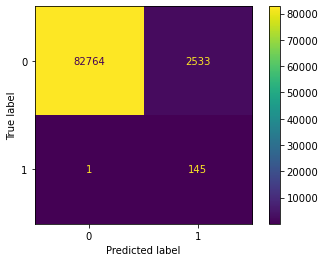

In [381]:
confusion_matrix(Y_test_unbalanced,knn_pred)
plot_confusion_matrix(knn_gs, X_test_unbalanced, Y_test_unbalanced)

In [382]:
print(classification_report(Y_test_unbalanced,knn_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85297
           1       0.05      0.99      0.10       146

    accuracy                           0.97     85443
   macro avg       0.53      0.98      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [383]:
%%time

mlp_parameters = {
    'activation': ['logistic', 'relu'],
    'hidden_layer_sizes': [1, 10, 100, 200],
    'alpha': [0.01, 0.05],
    'shuffle': [True, False],
    'beta_1': [0.999, 0.99, 0.9, 0.8],
    'beta_2': [0.999, 0.99, 0.9, 0.8],
    'epsilon': [1e-9, 1e-8, 1e-7]
}

mlp_gs: GridSearchCV = GridSearchCV(
    MLPClassifier(),
    param_grid=mlp_parameters,
    cv=5,
    verbose=1,
    n_jobs=-1
)

CPU times: user 56 µs, sys: 6 µs, total: 62 µs
Wall time: 65.1 µs


In [384]:
%%time
mlp_gs_results = mlp_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
CPU times: user 29.5 s, sys: 10.2 s, total: 39.8 s
Wall time: 20min 23s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed: 20.3min finished


In [385]:
%%time
mlp_gs_pred = mlp_gs_results.predict(X_test_unbalanced)

CPU times: user 860 ms, sys: 840 ms, total: 1.7 s
Wall time: 444 ms


In [386]:
result_print(mlp_gs_results)

0.9401129943502824
MLPClassifier(activation='logistic', alpha=0.05, beta_2=0.8, epsilon=1e-07,
              hidden_layer_sizes=200, shuffle=False)
{'activation': 'logistic', 'alpha': 0.05, 'beta_1': 0.9, 'beta_2': 0.8, 'epsilon': 1e-07, 'hidden_layer_sizes': 200, 'shuffle': False}


[[82307  2990]
 [    6   140]]


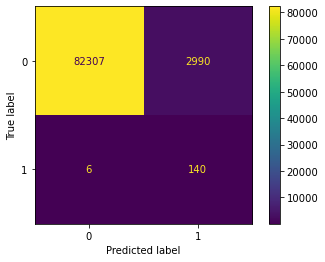

In [387]:
print(confusion_matrix(Y_test_unbalanced,mlp_gs_pred))
plot_confusion_matrix(mlp_gs, X_test_unbalanced, Y_test_unbalanced)


In [388]:
print(classification_report(Y_test_unbalanced,mlp_gs_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85297
           1       0.04      0.96      0.09       146

    accuracy                           0.96     85443
   macro avg       0.52      0.96      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [389]:
random_forest_param_grid = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

random_forest_gs = GridSearchCV(
    RandomForestClassifier(n_estimators=20),
    param_grid=random_forest_param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [390]:
random_forest_gs_results = random_forest_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   16.9s finished


In [391]:
%%time
random_forest_gs_pred = random_forest_gs_results.predict(X_test_unbalanced)

CPU times: user 131 ms, sys: 4.33 ms, total: 136 ms
Wall time: 134 ms


In [392]:
result_print(random_forest_gs_results)

0.9412429378531073
RandomForestClassifier(criterion='entropy', max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=20)
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}


[[84235  1062]
 [    3   143]]


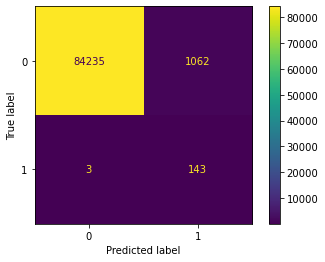

In [393]:
print(confusion_matrix(Y_test_unbalanced,random_forest_gs_pred))
plot_confusion_matrix(random_forest_gs, X_test_unbalanced, Y_test_unbalanced)


In [394]:
print(classification_report(Y_test_unbalanced,random_forest_gs_pred))



              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85297
           1       0.12      0.98      0.21       146

    accuracy                           0.99     85443
   macro avg       0.56      0.98      0.60     85443
weighted avg       1.00      0.99      0.99     85443

